<p style="font-family:Verdana; font-size: 26px; color: magenta"> 4.1 - Loan Eligibility Prediction using Machine Learning Models</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> we are going to develop one such model that can predict whether a person will get his/her loan approved or not by </p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1. using some of the background information of the applicant like the applicant's gender, marital status, income, etc.
</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Loading the Data</p>

In [2]:
# Ihe dataset contains 284,807 transactions with 31 features including:
df = pd.read_csv('../../data/loan_data.csv')
 
df.head(3)

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y


In [3]:
df.shape

(598, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,598.0,5292.252508,5807.265364,150.0,2877.5,3806.0,5746.0,81000.0
LoanAmount,577.0,144.968804,82.704182,9.0,100.0,127.0,167.0,650.0


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Exploratory Data Analysis</p>

In [6]:
# To check the null values in the dataset.
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column LoanAmount contains 21 null values.


In [7]:
# df = df.dropna()
# print("Total values in the dataset after removing the null values:", len(df))

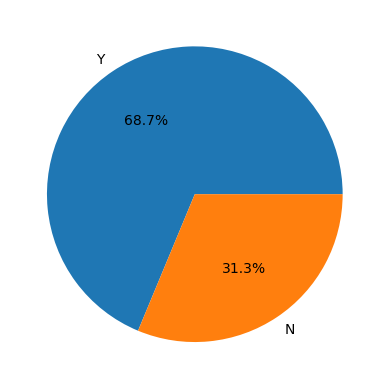

In [8]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

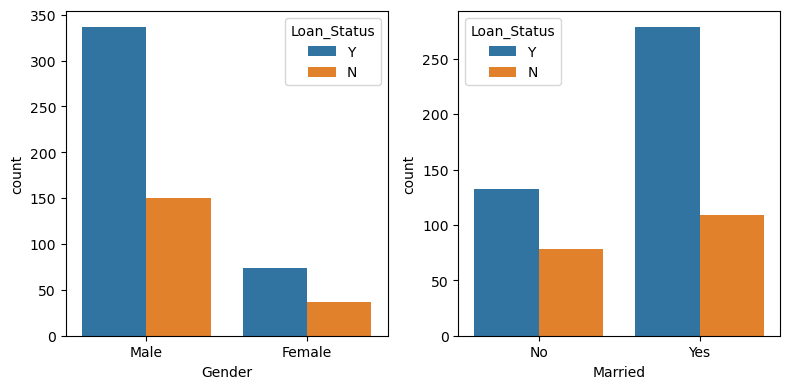

In [11]:
# We specify the DataFrame df as the data source for the sb.countplot() function. 
plt.figure(figsize=(8, 4))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

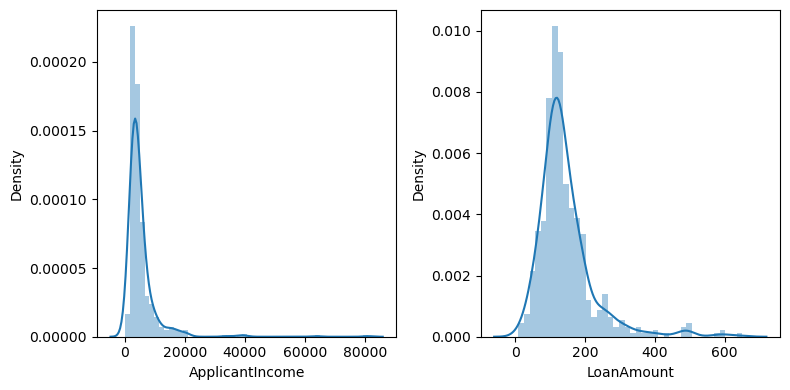

In [13]:
# we can draw here is that the chances of getting a loan approved 
# for married people are quite low compared to those who are not married.
plt.figure(figsize=(8, 4))

for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

<p style="font-family:Verdana; font-size: 16px; color: magenta"> To find out the outliers in the columns, we can use boxplot.</p>

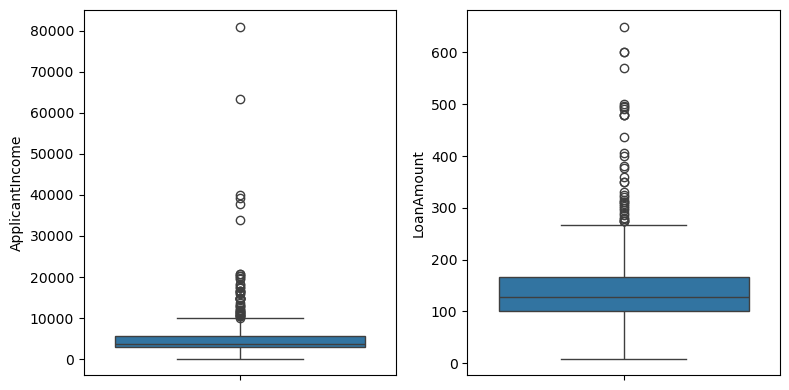

In [16]:
plt.figure(figsize=(8, 4))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [18]:
# There are some extreme outlier's in the data we need to remove them.
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

In [20]:
# Let's see the mean amount of the loan granted to males as well as females. 
# For that, we will use groupyby() method.
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']

Gender
Female    126.697248
Male      146.872294
Name: LoanAmount, dtype: float64

In [22]:
# The loan amount requested by males is higher than what is requested by females.

In [23]:
df.groupby(['Married', 'Gender']).mean(numeric_only=True)['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

In [ ]:
# The married people requested loan amount is generally higher than that of the unmarried.

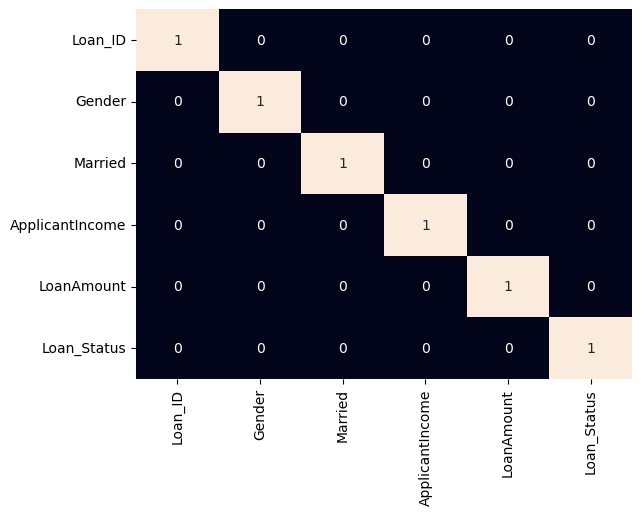

In [24]:
# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

# Applying function in whole column
df = encode_labels(df)

# Generating Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Data Preprocessing</p>

In [15]:
# Data visualization is the graphical representation of information and data in a pictorial or graphical format. 

In [25]:
features = df.drop('Loan_Status', axis=1) 
target = df['Loan_Status'].values 

X_train, X_val,	Y_train, Y_val = train_test_split(features, target, 
									test_size=0.2, 
									random_state=10) 

# As the data was highly imbalanced we will balance 
# it by adding repetitive rows of minority class. 
ros = RandomOverSampler(sampling_strategy='minority', 
						random_state=0) 
X, Y = ros.fit_resample(X_train, Y_train) 

X_train.shape, X.shape 

((456, 5), (638, 5))

In [27]:
# We will now use Standard scaling for normalizing the data. 
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Model Development</p>

In [28]:
# Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. 
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)

print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy :  0.6300940438871474
Validation Accuracy :  0.48198198198198194



<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: Model Evaluation</p>

In [30]:
# Model Evaluation can be done using confusion matrix.
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# we first train the SVC model using the training data X and Y.
# Then, we calculate the ROC AUC scores for both the training and validation datasets. 
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(Y_val, model.predict(X_val))
print('Training ROC AUC Score:', training_roc_auc)
print('Validation ROC AUC Score:', validation_roc_auc)
print()
# Finally, we plot the confusion matrix using the plot_confusion_matrix function 
# from the sklearn.metrics.plot_confusion_matrix submodule.
cm = confusion_matrix(Y_val, model.predict(X_val))

Training ROC AUC Score: 0.6300940438871474
Validation ROC AUC Score: 0.48198198198198194



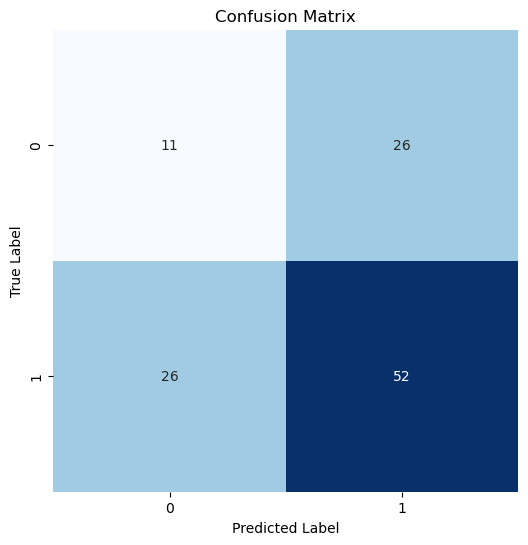

In [31]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        37
           1       0.67      0.67      0.67        78

    accuracy                           0.55       115
   macro avg       0.48      0.48      0.48       115
weighted avg       0.55      0.55      0.55       115

